EDA Steps:

1.  Drop columns with insufficient data
2.  Dummy columns
3.  Highest corr variables


<br>Overall Qual            0.800207   plot
<br>Gr Liv Area             0.697038   plot
<br>Garage Area             0.650270   plot
<br>Garage Cars             0.648220  - exclude (not independent of area)
<br>Total Bsmt SF           0.628925 - not ind
<br>1st Flr SF              0.618486 - not ind
<br>Exter Qual_TA           0.600362   not ind
<br>Year Built              0.571849   plot
<br>Year Remod/Add          0.550370   plot
<br>Kitchen Qual_TA         0.540860   not ind
<br>Full Bath               0.537969   plot
<br>Garage Yr Blt           0.533922    
<br>Foundation_PConc        0.529047
<br>Mas Vnr Area            0.512230
<br>TotRms AbvGrd           0.504014


In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import scipy.stats

In [62]:
ames = pd.read_csv('./datasets/train.csv')


In [63]:
ames.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [64]:
ames.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


109     1
1377    1
1521    1
1719    1
1221    1
       ..
1965    1
1598    1
1796    1
2619    1
10      1
Name: Id, Length: 2051, dtype: int64

In [4]:
ames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [78]:
ames.head(20)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500
5,138,535126040,20,RL,137.0,16492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,6,2010,WD,190000
6,2827,908186070,180,RM,35.0,3675,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,6,2006,New,140000
7,145,535154050,20,RL,NaN,12160,Pave,NaN,IR1,Lvl,...,0,0,NaN,MnPrv,NaN,0,5,2010,COD,142000
8,1942,535353130,20,RL,NaN,15783,Pave,NaN,Reg,Lvl,...,0,0,NaN,MnPrv,Shed,400,6,2007,WD,112500
9,1956,535426130,60,RL,70.0,11606,Pave,NaN,IR1,HLS,...,0,0,NaN,NaN,NaN,0,9,2007,WD,135000


In [6]:
ames = pd.get_dummies(columns = ['Street','Alley','Lot Shape','Land Contour','Utilities','Lot Config','Land Slope','Neighborhood','Condition 1','Condition 2','Bldg Type',
                                 'House Style','Roof Style','Roof Matl','Exterior 1st','Exterior 2nd','Mas Vnr Type','Exter Qual','Exter Cond','Foundation','Bsmt Qual',
                                 'Bsmt Cond','Bsmt Exposure','BsmtFin Type 1','BsmtFin Type 2','Heating','Heating QC','Central Air','Electrical','Kitchen Qual','Functional',
                                 'Fireplace Qu','Garage Type','Garage Finish','Garage Qual','Garage Cond','Paved Drive','Pool QC','Fence','Misc Feature','Sale Type'],data=ames,drop_first=True)


In [30]:
X = ames.drop(columns='SalePrice')
y = ames['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [41]:
abs(X_train.corrwith(y_train)).sort_values(ascending=False).head(20)

Overall Qual            0.795239
Gr Liv Area             0.690825
Garage Cars             0.645751
Garage Area             0.640498
Total Bsmt SF           0.610300
1st Flr SF              0.598143
Exter Qual_TA           0.593214
Year Built              0.558355
Year Remod/Add          0.548344
Full Bath               0.540079
TotRms AbvGrd           0.532523
Kitchen Qual_TA         0.526306
Garage Yr Blt           0.522000
Foundation_PConc        0.521922
Mas Vnr Area            0.519491
Fireplaces              0.491080
BsmtFin Type 1_GLQ      0.458115
Bsmt Qual_TA            0.445893
Exter Qual_Gd           0.444015
Neighborhood_NridgHt    0.435672
dtype: float64

## Cleaning Training Data

In [ ]:
fig, axs = plt.subplots(3,2, figsize=(12,10))

sns.histplot(X_train['Overall Qual'],
                ax=axs[0])
sns.histplot(data=ames,
                x = 'Gr Liv Area',
                ax=axs[1])
sns.histplot(data=ames,
                x = 'Garage Area',
                ax=axs[2])
sns.histplot(data=ames,
                x = 'Year Built',
                ax=axs[3])
sns.histplot(data=ames,
                x = 'Full Bath',
                ax=axs[4])

<AxesSubplot:xlabel='Fireplaces', ylabel='SalePrice'>

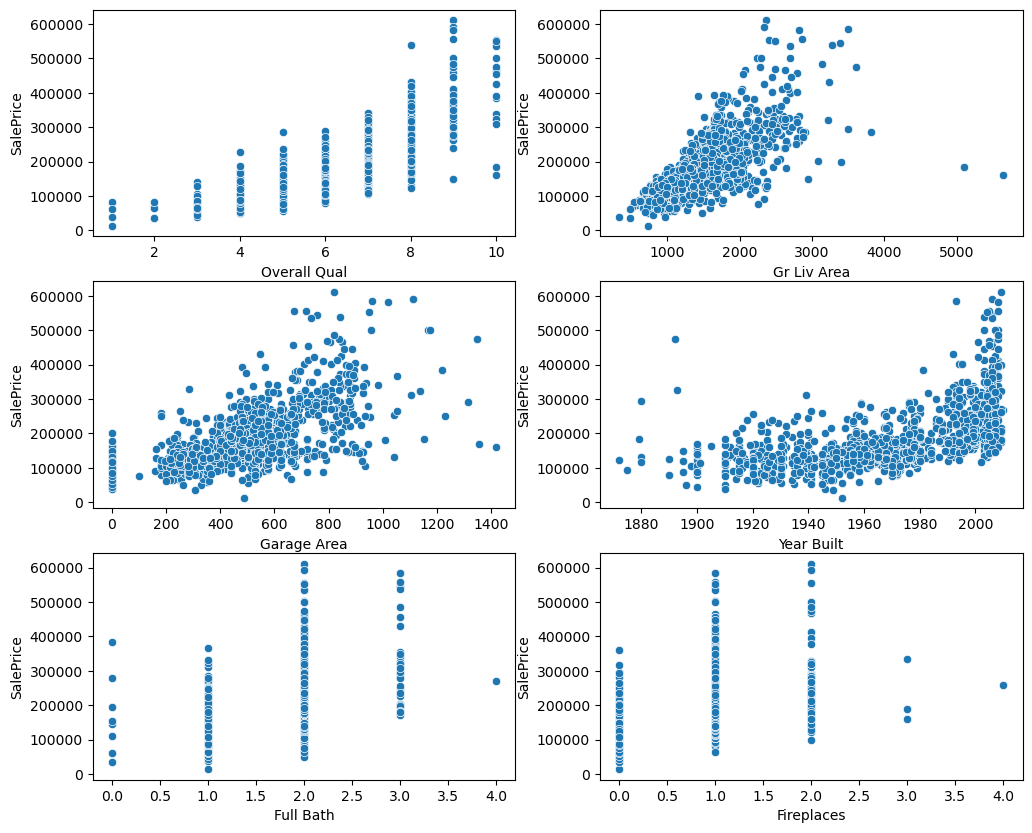

In [47]:
fig, axs = plt.subplots(3,2, figsize=(12,10))

sns.scatterplot(y = y_train,
                x = X_train['Overall Qual'],
                ax=axs[0][0])

sns.scatterplot(y = y_train,
                x = X_train['Gr Liv Area'],
                ax=axs[0][1])

sns.scatterplot(y = y_train,
                x = X_train['Garage Area'],
                ax=axs[1][0])

sns.scatterplot(y = y_train,
                x = X_train['Year Built'],
                ax=axs[1][1])

sns.scatterplot(y = y_train,
                x = X_train['Full Bath'],
                ax=axs[2][0])

sns.scatterplot(y = y_train,
                x = X_train['Fireplaces'],
                ax=axs[2][1])

<AxesSubplot:xlabel='Fireplaces', ylabel='SalePrice'>

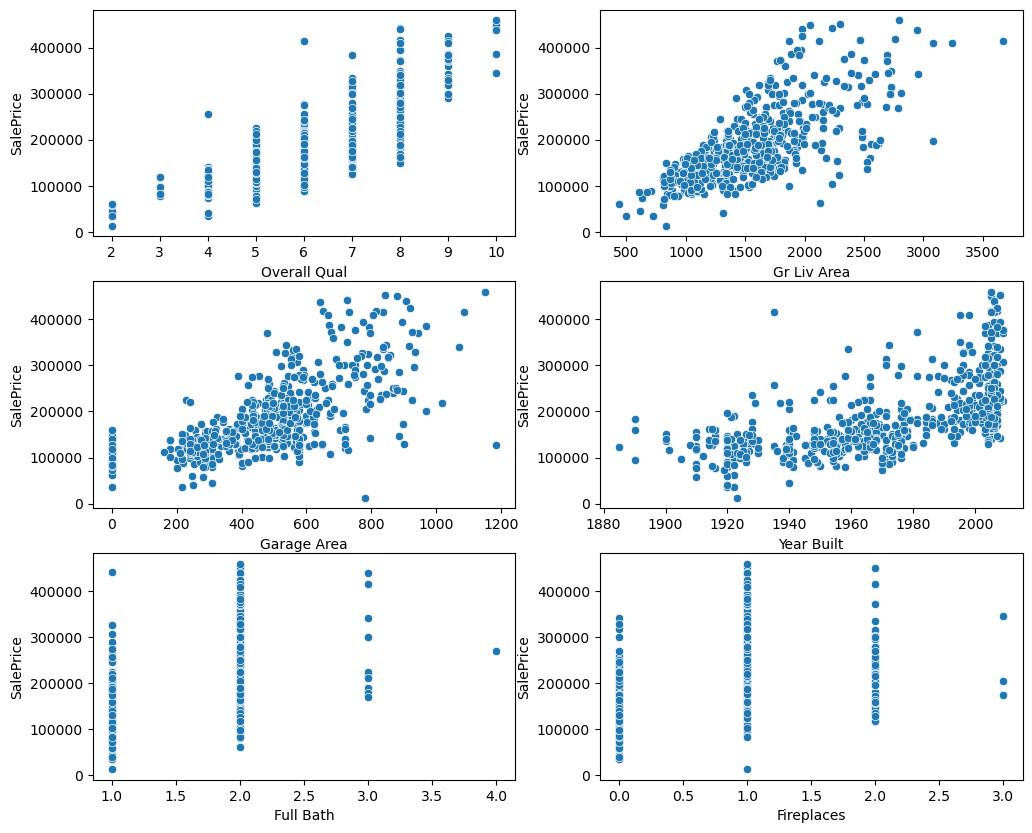

In [48]:
fig, axs = plt.subplots(3,2, figsize=(12,10))

sns.scatterplot(y = y_test,
                x = X_test['Overall Qual'],
                ax=axs[0][0])

sns.scatterplot(y = y_test,
                x = X_test['Gr Liv Area'],
                ax=axs[0][1])

sns.scatterplot(y = y_test,
                x = X_test['Garage Area'],
                ax=axs[1][0])

sns.scatterplot(y = y_test,
                x = X_test['Year Built'],
                ax=axs[1][1])

sns.scatterplot(y = y_test,
                x = X_test['Full Bath'],
                ax=axs[2][0])

sns.scatterplot(y = y_test,
                x = X_test['Fireplaces'],
                ax=axs[2][1])

## Cleaning Test Data

<AxesSubplot:xlabel='Full Bath', ylabel='Count'>

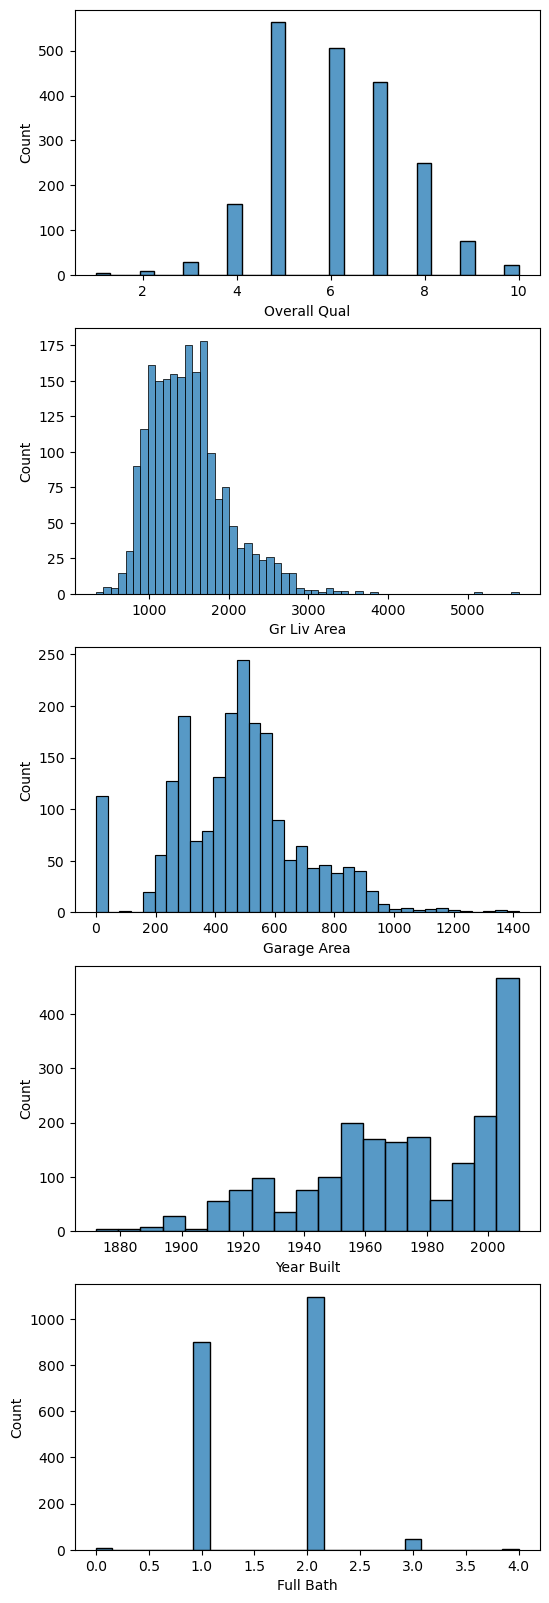

In [9]:
fig, axs = plt.subplots(5,1, figsize=(6,20))

sns.histplot(data=ames,
                x = 'Overall Qual',
                ax=axs[0])
sns.histplot(data=ames,
                x = 'Gr Liv Area',
                ax=axs[1])
sns.histplot(data=ames,
                x = 'Garage Area',
                ax=axs[2])
sns.histplot(data=ames,
                x = 'Year Built',
                ax=axs[3])
sns.histplot(data=ames,
                x = 'Full Bath',
                ax=axs[4])

In [12]:
print(X_train[X_train['Gr Liv Area'] < 700 ]['Gr Liv Area'].sort_values().value_counts())
print(X_test[X_test['Gr Liv Area'] < 700 ]['Gr Liv Area'].sort_values().value_counts())

672    3
630    2
334    1
480    1
492    1
520    1
540    1
572    1
616    1
640    1
660    1
666    1
693    1
694    1
698    1
Name: Gr Liv Area, dtype: int64
438    1
498    1
605    1
612    1
630    1
672    1
Name: Gr Liv Area, dtype: int64
